# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.


# Dataset berasal dari Kaggle '**All Computer Prices**'
[link text](https://www.kaggle.com/datasets/paperxd/all-computer-prices/)

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [ ]:
#Type your code here
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from google.colab import files


# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [ ]:
# Upload file dari lokal
uploaded = files.upload()

Saving computer_prices_all.csv to computer_prices_all.csv


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 33 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   device_type          100000 non-null  object 
 1   brand                100000 non-null  object 
 2   model                100000 non-null  object 
 3   release_year         100000 non-null  int64  
 4   os                   100000 non-null  object 
 5   form_factor          100000 non-null  object 
 6   cpu_brand            100000 non-null  object 
 7   cpu_model            100000 non-null  object 
 8   cpu_tier             100000 non-null  int64  
 9   cpu_cores            100000 non-null  int64  
 10  cpu_threads          100000 non-null  int64  
 11  cpu_base_ghz         100000 non-null  float64
 12  cpu_boost_ghz        100000 non-null  float64
 13  gpu_brand            100000 non-null  object 
 14  gpu_model            100000 non-null  object 
 15  gpu_

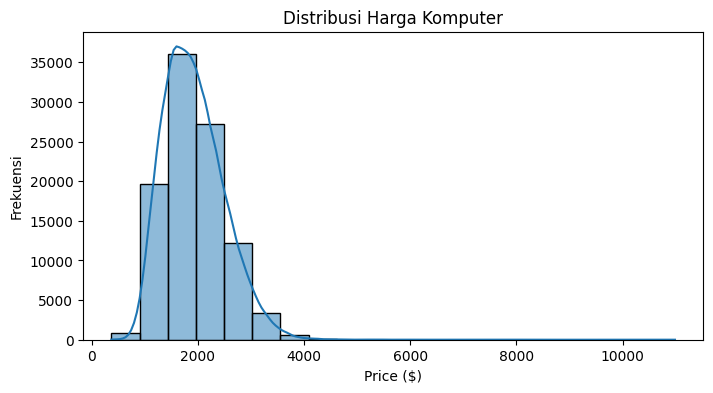

In [ ]:
df = pd.read_csv('computer_prices_all.csv')
print("Dataset Info:")
print(df.info())
print("\nDescriptive Statistics:")
print(df.describe())
print("\nMissing Values:")
print("\nJumlah Nilai Kosong per Kolom:")
print(df.isnull().sum())

# Visualisasi harga
plt.figure(figsize=(8,4))
sns.histplot(df['price'], bins=20, kde=True)
plt.title("Distribusi Harga Komputer")
plt.xlabel("Price ($)")
plt.ylabel("Frekuensi")
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [ ]:
# --- 4.1 Menghapus atau Menangani Data Kosong (Missing Values)
df = df.dropna()
print("\nSetelah menghapus missing values:", df.shape)

# --- 4.2 Menghapus Data Duplikat
before = df.shape[0]
df = df.drop_duplicates()
after = df.shape[0]
print(f"Data duplikat dihapus: {before - after}")

# --- 4.3 Normalisasi atau Standarisasi Fitur Numerik
scaler = MinMaxScaler()
num_cols = df.select_dtypes(include=['float64','int64']).columns
df[num_cols] = scaler.fit_transform(df[num_cols])
print("\nNormalisasi fitur numerik selesai.")

# --- 4.4 Deteksi dan Penanganan Outlier (Z-Score)
z = np.abs(stats.zscore(df[num_cols]))
df = df[(z < 3).all(axis=1)]
print("Outlier dihapus, ukuran data sekarang:", df.shape)

# --- 4.5 Encoding Data Kategorikal
cat_cols = df.select_dtypes(include=['object']).columns
encoder = LabelEncoder()
for col in cat_cols:
    df[col] = encoder.fit_transform(df[col])
print("\nEncoding data kategorikal selesai.")

# --- 4.6 Binning (Contoh pada Kolom 'price')
df['price_bin'] = pd.qcut(df['price'], q=3, labels=['Low', 'Medium', 'High'])
print("\nContoh hasil binning pada kolom price:")
print(df[['price', 'price_bin']].head())


Setelah menghapus missing values: (100000, 33)
Data duplikat dihapus: 0

Normalisasi fitur numerik selesai.
Outlier dihapus, ukuran data sekarang: (82347, 33)

Encoding data kategorikal selesai.

Contoh hasil binning pada kolom price:
      price price_bin
0  0.095270       Low
1  0.179231      High
2  0.142009    Medium
3  0.090369       Low
4  0.217584      High


In [ ]:
# Simpan dataset yang sudah diproses
df.to_csv("computer_prices_clean.csv", index=False)